In [1]:
#IMPORT

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics

In [2]:
#EEGLAB (.set, .fdt)
x=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010002_EC.set', preload=True, verbose=True)
print(x.info)

Reading Files/Preprocessed/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 59 items (59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>


In [3]:
chanles_names = x.ch_names
print(len(x.ch_names))
print(chanles_names)

59
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'AFz', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FT7', 'FC3', 'FC4', 'FT8', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [4]:
datax = x._data

In [5]:
datax.shape

(59, 119345)

In [6]:
type(datax)

numpy.ndarray

In [7]:

ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(x)

ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 4.5s.


<ICA | raw data decomposition, fit (fastica): 119345 samples, 20 components, channels used: "eeg", 2 sources marked for exclusion>

In [8]:
datax

array([[ 3.40185380e-06, -1.15108478e-06, -3.05285215e-06, ...,
        -5.36247635e-06, -1.07306349e-06,  1.44466424e-06],
       [ 2.23387265e-06,  2.42891002e-06, -1.71568549e-06, ...,
        -4.02878571e-06, -3.61581445e-06, -1.67563868e-06],
       [-3.92220187e-06, -5.43169308e-06, -7.98797464e-06, ...,
        -2.61301637e-06, -2.29822683e-06, -1.08431530e-06],
       ...,
       [-9.06954002e-06, -1.13523130e-05, -1.27948065e-05, ...,
         8.56233406e-06,  6.84639597e-06,  3.32538366e-06],
       [-6.15342760e-06, -4.73464394e-06, -4.12048912e-06, ...,
         8.53900814e-06,  6.83162975e-06,  3.94542956e-06],
       [-2.96153688e-06, -6.27886891e-07, -1.67830978e-08, ...,
         3.16720605e-06,  7.71605730e-06,  1.06859007e-05]])

In [9]:
upperchanels=[]
for i in chanles_names:
    r = i.upper()
    upperchanels.append(r)

In [10]:
i=0
l=[]

for e in datax:
    f=[]
    f.append(upperchanels[i])
    i=i+1
    f.append(e)
    l.append(f)

In [11]:
def group(nomgroup):
    group_date = []
    for e in nomgroup:
        if e in upperchanels:
            num = upperchanels.index(e)
            #print(num)
            group_date.append(datax[num])  
    #print(group_date)
    return group_date


In [12]:
#Medium 
#group_dat = [[1,2,3,..., 119345],[1,2,3,..., 119345],[1,2,3,..., 119345],[1,2,3,..., 119345]]
def mediumchanels(group_dat):
    segundo = len(group_dat[0])
    primero = len(group_dat)
    mean_data = []
    for i in range (0,segundo):
        suma1=[]
        for e in range(0,primero):
            suma1.append(group_dat[e][i])
        numpero = statistics.median(suma1)
        mean_data.append(numpero)
    return mean_data
        


In [13]:
#LOOP GROUPS
#GROUPS
group1= ["Fp2", "AFZ", "FZ", "FCZ", "CZ"]
group2= ["F7", "F5", "F3", "F1", "AF7", "AF3", "FP1"]
group3= ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8"]
group4= ["FT7", "T7", "TP7"]
group5= ["FC5", "FC3", "FC1", "C5", "C3", "C1"]
group6= ["CP5", "CP3", "CP1", "P7", "P5", "P4", "P1"]
group7= ["PO7", "PO3", "O1"]
group8= ["PO4", "PO8", "O2"]
group9= ["P2", "P4", "P6", "P8", "CP2", "PC4", "PC6"]
group10= ["FT8", "T8", "TP8"]
group11= ["CPZ", "Pz", "POZ", "OZ", "IZ"]
group12= ["FC2", "FC4", "FC6", "C2", "C4", "C6"]

#X
groups = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12]

groups_date_finale = [] #Save all informatio chanels 12.

for i in groups:
    group_date = group(i)
    mean_group = mediumchanels(group_date)
    mean_array = np.array(mean_group)
    groups_date_finale.append(mean_array)
groups_date_final = np.array(groups_date_finale)

In [14]:
GROUPPP=["FC2", "FC4", "FC6", "C2", "C4", "C6", "CPZ", "Pz", "POZ", "OZ", "IZ", "FT8", "T8", "TP8", "P2", "P4", "P6", "P8", "CP2", "PC4", "PC6", "PO4", "PO8", "O2", "PO7", "PO3", "O1", "CP5", "CP3", "CP1", "P7", "P5", "P4", "P1", "FC5", "FC3", "FC1", "C5", "C3", "C1", "Fp2", "AFZ", "FZ", "FCZ", "CZ"]
# CHANELS NOT IN THE IMAGE:
notingroup=[]
NUMER_ITEMS_NOR=0
for i in upperchanels:
    if i not in GROUPPP:
        notingroup.append(i)
        NUMER_ITEMS_NOR=NUMER_ITEMS_NOR+1
print(NUMER_ITEMS_NOR)
print(notingroup)

21
['FP1', 'FP2', 'F7', 'F3', 'F4', 'F8', 'CP6', 'P3', 'PZ', 'PO9', 'PO10', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FT7', 'CP4']


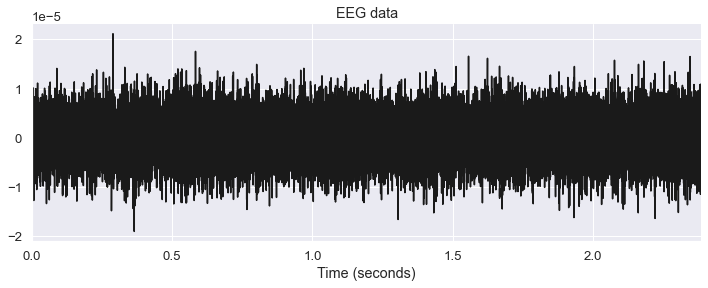

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
data = groups_date_final[1]
# Define sampling frequency and time vector
sf = 50000.
time = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

plt.plot(time, data, lw=1.5, color='k')

plt.xlabel('Time (seconds)')
plt.xlim([time.min(), time.max()])
plt.title('EEG data')
sns.despine()

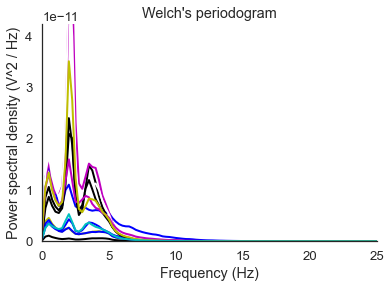

In [16]:
from scipy import signal
import matplotlib.colors as mcolors
import random
colors = mcolors.BASE_COLORS 

for i in range(0,len(groups_date_final)):
    data = groups_date_final[i]
    # Define window length (4 seconds)
    win = 4 * sf
    freqs, psd = signal.welch(data, sf, nperseg=win)

    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    #plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color=random.choice(list(colors.values())), lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 8])
    plt.title("Welch's periodogram")
    plt.xlim([0, freqs.max()])
    sns.despine()

In [17]:
'''1 value x channel x band x trials x subject x condition (EO/EC): 3 x N for EO (channels, bands, trials), 3 x N for EC (channels, bands, trials), where N is the number of subjects. 
'''


'1 value x channel x band x trials x subject x condition (EO/EC): 3 x N for EO (channels, bands, trials), 3 x N for EC (channels, bands, trials), where N is the number of subjects. \n'

In [18]:
'''extract the bandpower of: theta (4-8Hz), alpha(8-13Hz), beta(13-30Hz), gamma(30-45Hz). 
http://biosignalsplux.com/learn/notebooks/Categories/Extract/eeg_extract_alphaband_rev.html 
https://github.com/PIA-Group/BioSPPy/blob/master/biosppy/signals/eeg.py 
'''

'extract the bandpower of: theta (4-8Hz), alpha(8-13Hz), beta(13-30Hz), gamma(30-45Hz). \nhttp://biosignalsplux.com/learn/notebooks/Categories/Extract/eeg_extract_alphaband_rev.html \nhttps://github.com/PIA-Group/BioSPPy/blob/master/biosppy/signals/eeg.py \n'

In [19]:
'''split the groups in terms of mind-wandering ratings as in the paper, and plot the power spectral density of each group as in: '''

'split the groups in terms of mind-wandering ratings as in the paper, and plot the power spectral density of each group as in: '